<a href="https://colab.research.google.com/github/erikamarchi/data-visualization-explorando-com-seaborn/blob/main/EDA_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#dataset

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('tips.csv')

In [3]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [4]:
gorjetas = dados.rename(columns={'total_bill':'valor_da_conta',
              'tip':'gorjeta',
              'dessert':'sobremesa',
              'day':'dia_da_semana',
              'time':'hora_do_dia',
              'size':'total_de_pessoas'})
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [5]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [6]:
gorjetas.sobremesa.replace({'Yes':'Sim',
                            'No':'Não'}, inplace=True)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [7]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [8]:
gorjetas.dia_da_semana.replace({'Sun':'Domingo',
                                'Sat':'Sábado',
                                'Thur':'Quinta',
                                'Fri':'Sexta'}, inplace=True)
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [9]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [10]:
gorjetas.hora_do_dia.replace({'Dinner':'Jantar',
                                'Lunch':'Almoço'}, inplace=True)
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

In [11]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


#import do seaborn

In [12]:
import seaborn as sns

#Valor da conta e gorjeta

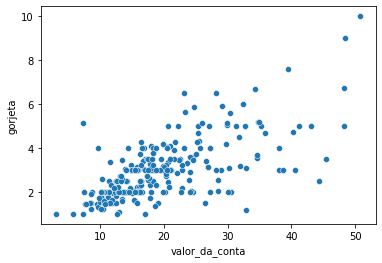

In [13]:
sns.scatterplot(x='valor_da_conta',
                y='gorjeta',
                data = gorjetas);

**Visualmente o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [14]:
gorjetas.shape

(244, 6)

In [15]:
print(f'A base de dados contém {gorjetas.shape[0]} registros. \n')
print(f'Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros. 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

##Criando campo porcentagem

In [16]:
gorjetas['porcentagem'] = (gorjetas.gorjeta/gorjetas.valor_da_conta).round(2)

In [17]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


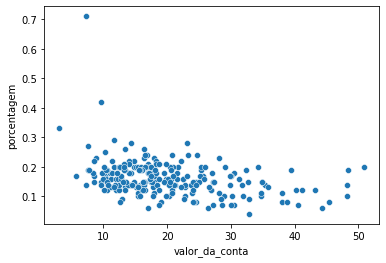

In [18]:
sns.scatterplot(x='valor_da_conta',
                y='porcentagem',
                data=gorjetas);

**Visualmente o valor da conta não é proporcional ao valor da gorjeta**

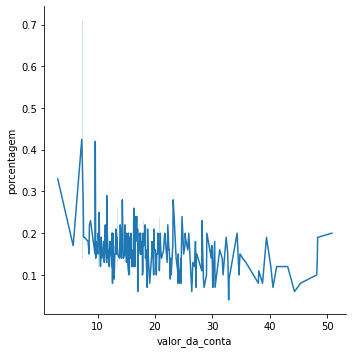

In [19]:
sns.relplot(x='valor_da_conta', 
            y='porcentagem', 
            data=gorjetas,
            kind='line');

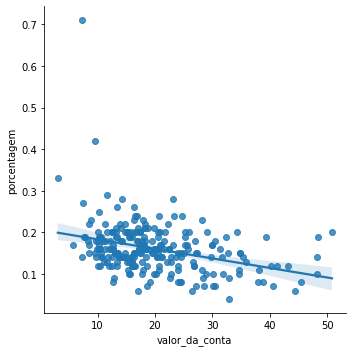

In [20]:
sns.lmplot(x='valor_da_conta',
           y='porcentagem',
           data=gorjetas);

#Analisa se sobremesa influencia na gorjeta

In [23]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [24]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


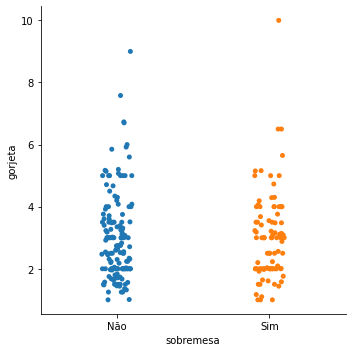

In [26]:
sns.catplot(x='sobremesa',
            y='gorjeta',
            data=gorjetas);

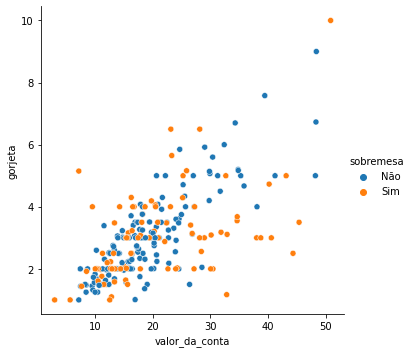

In [27]:
sns.relplot(x='valor_da_conta',
            y='gorjeta',
            data=gorjetas,
            hue='sobremesa')

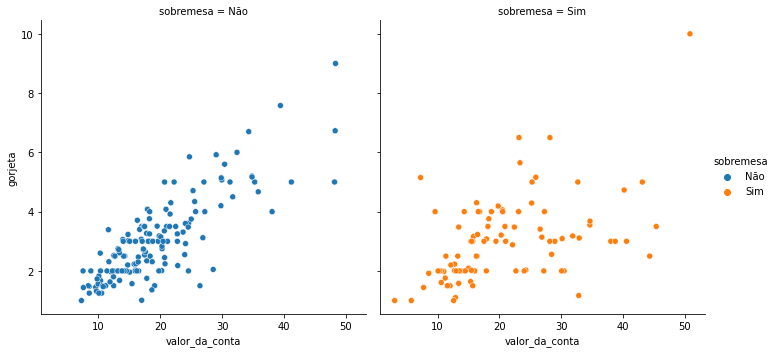

In [29]:
sns.relplot(x='valor_da_conta',
            y='gorjeta',
            data=gorjetas,
            hue='sobremesa',
            col='sobremesa');

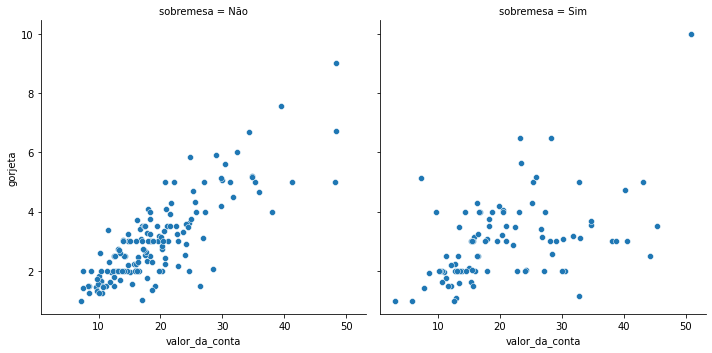

In [30]:
sns.relplot(x='valor_da_conta',
            y='gorjeta',
            data=gorjetas,
            col='sobremesa');

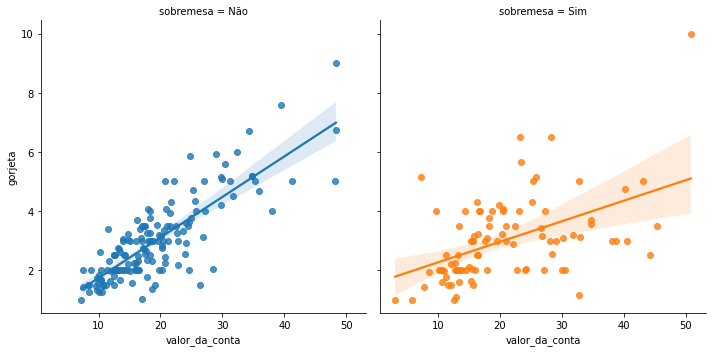

In [31]:
sns.lmplot(x='valor_da_conta',
           y='gorjeta',
           data=gorjetas,
           hue='sobremesa',
           col='sobremesa');

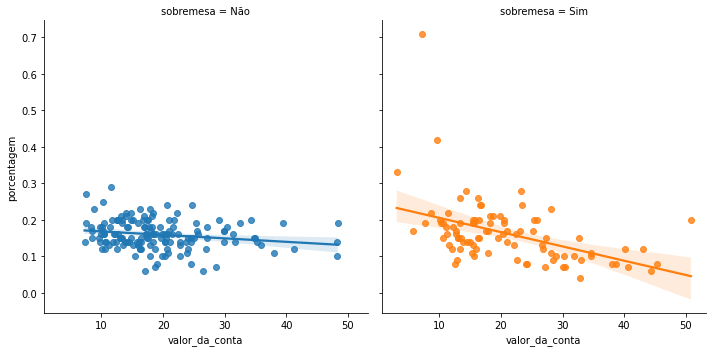

In [32]:
sns.lmplot(x='valor_da_conta',
           y='porcentagem',
           data=gorjetas,
           hue='sobremesa',
           col='sobremesa');

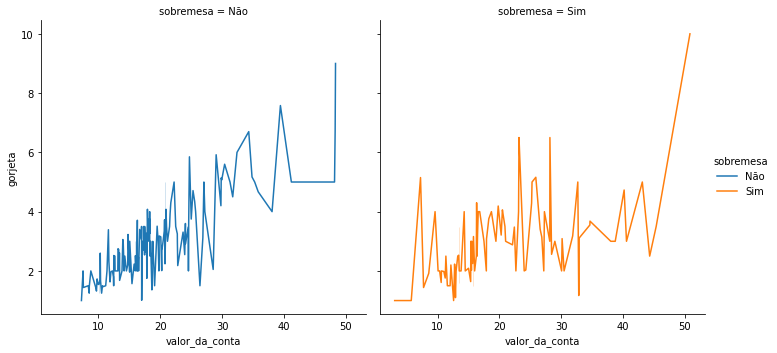

In [34]:
sns.relplot(x='valor_da_conta', 
            y='gorjeta', 
            data=gorjetas,
            col='sobremesa', 
            hue='sobremesa', 
            kind='line' )

**Visualmente existe uma diferença na gorjeta daqueles que pediram sobremesa e não pediram sobremesa**

##Teste de hipótese

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [35]:
from scipy.stats import ranksums

In [38]:
select = 'sobremesa == "Sim"'
sobremesa = gorjetas.query(select).porcentagem

In [39]:
select = 'sobremesa == "Não"'
semSobremesa = gorjetas.query(select).porcentagem

In [41]:
r = ranksums(sobremesa,semSobremesa)

Como o pvalue foi superior a 0.05, descartamos a hipótese alternativa e ficamos com a hipótese nula

In [43]:
print(f'o valor do p-value é {r.pvalue}')

o valor do p-value é 0.5266635660124415


**H<sup>null</sup>**

**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

In [45]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


#Analisa de dia da semana tem relação com o valor da gorjeta

In [47]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

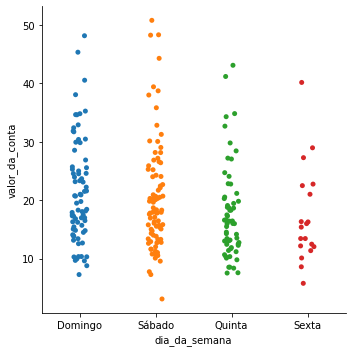

In [50]:
sns.catplot(x='dia_da_semana', 
            y='valor_da_conta', 
            data=gorjetas);

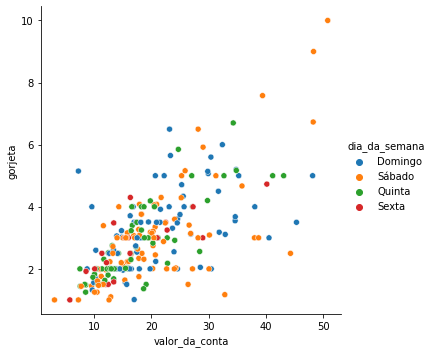

In [53]:
sns.relplot(hue='dia_da_semana', 
            x='valor_da_conta', 
            y='gorjeta',
            data=gorjetas);

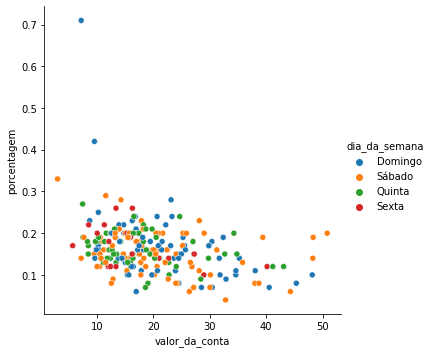

In [54]:
sns.relplot(hue='dia_da_semana', 
            x='valor_da_conta', 
            y='porcentagem',
            data=gorjetas);

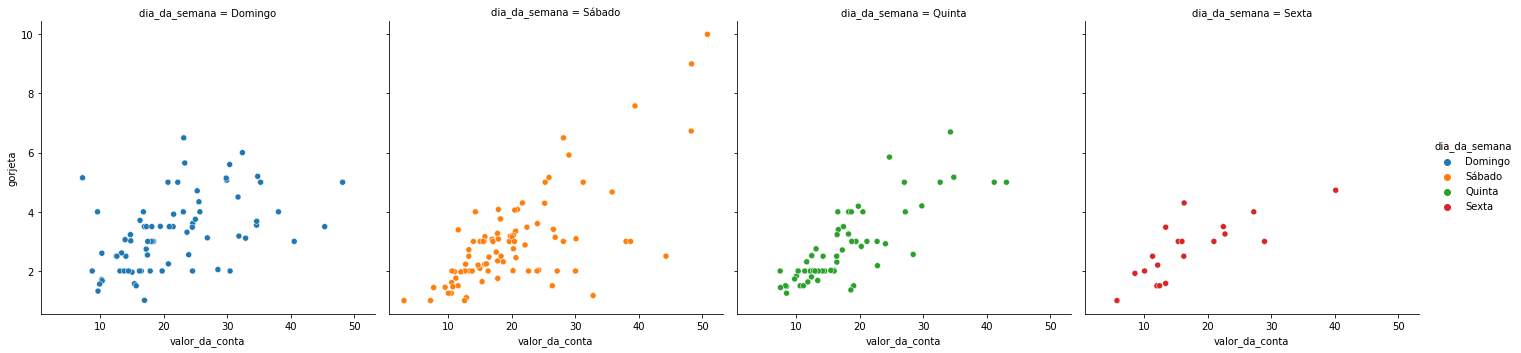

In [56]:
sns.relplot(hue='dia_da_semana', 
            x='valor_da_conta', 
            y='gorjeta',
            col='dia_da_semana',
            data=gorjetas);

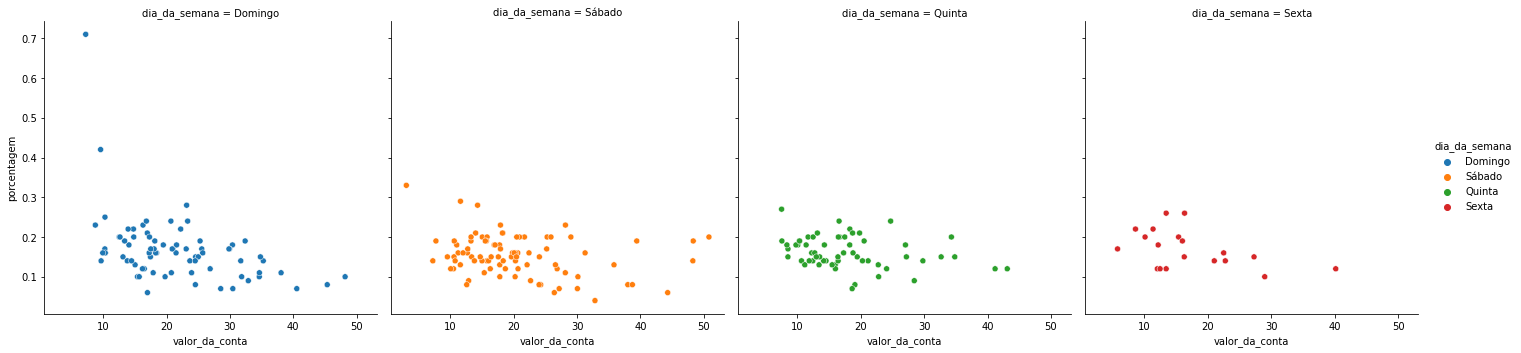

In [59]:
sns.relplot(hue='dia_da_semana', 
            x='valor_da_conta', 
            y='porcentagem',
            col='dia_da_semana',
            data=gorjetas);

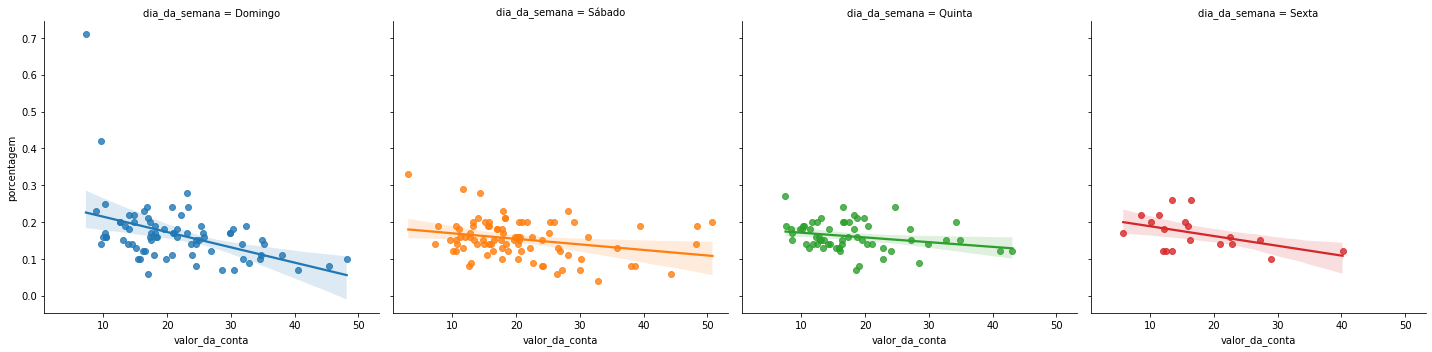

In [60]:
sns.lmplot(hue='dia_da_semana', 
            x='valor_da_conta', 
            y='porcentagem',
            col='dia_da_semana',
            data=gorjetas);

In [64]:
mediaGeralGorjetas = gorjetas.gorjeta.mean()

In [62]:
print(f'A média das gorjetas é de {mediaGeralGorjetas}')

A média das gorjetas é de 2.9982786885245902


In [66]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [69]:
print('Frequência das gorjetas')
gorjetas.dia_da_semana.value_counts()

Frequência das gorjetas


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

##Teste de hipótese

**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no sábado e no domingo**

In [70]:
valorDaContaDomingo = gorjetas.query('dia_da_semana == "Domingo"').valor_da_conta
valorDaContaSabado = gorjetas.query('dia_da_semana == "Sábado"').valor_da_conta

In [73]:
rDiaDaSemana = ranksums(valorDaContaDomingo, valorDaContaSabado)

In [74]:
print(f'O valor do p-value é {rDiaDaSemana.pvalue}')

O valor do p-value é 0.3576728477868443


Como o p-value é maior do que 0.05 a hipótese alternativa é descartada. Ficamos com <br>
**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no sábado e no domingo**

#Analisa se a hora do dia tem relação com a gorjeta

In [76]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [77]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

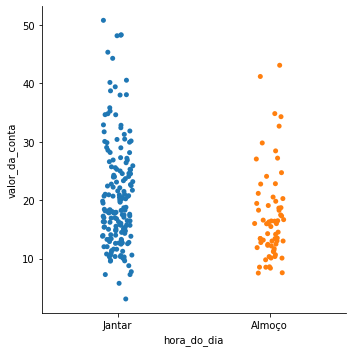

In [78]:
sns.catplot(x='hora_do_dia',
            y='valor_da_conta',
            data=gorjetas);

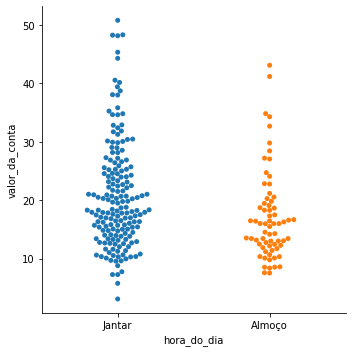

In [80]:
sns.catplot(x='hora_do_dia',
            y='valor_da_conta',
            data=gorjetas,
            kind='swarm');

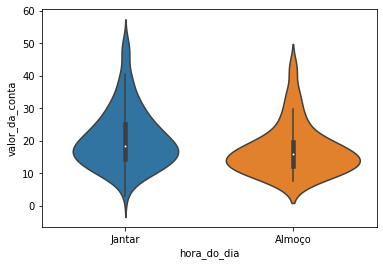

In [81]:
sns.violinplot(x='hora_do_dia',
               y='valor_da_conta',
               data=gorjetas);

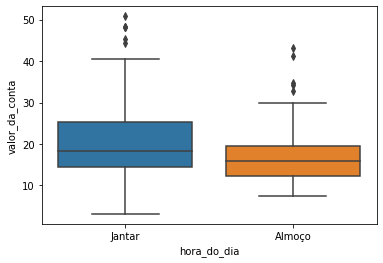

In [83]:
sns.boxplot(x='hora_do_dia',
              y='valor_da_conta',
              data=gorjetas);

In [85]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

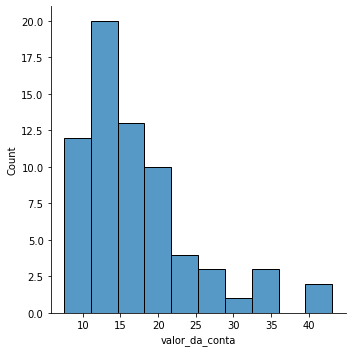

In [90]:
sns.displot(almoco);

In [91]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

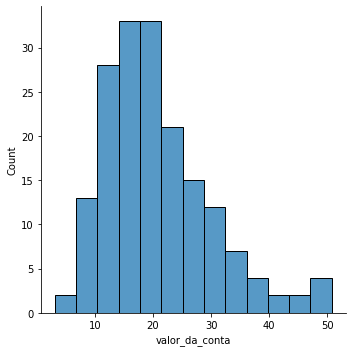

In [93]:
sns.displot(jantar);

In [95]:
gorjetas.groupby('hora_do_dia').mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


##Teste de hipótese

**H<sup>null</sup>**
> **A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no jantar e no almoço**

In [97]:
rHoraDoDia = ranksums(jantar,almoco)
rHoraDoDia

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

Como o p-value é menor do que 0.05 rejeitamos a hipótese nula e ficamos com a hipótese alternativa

In [99]:
print(f'O valor do p-value é de {rHoraDoDia.pvalue}')

O valor do p-value é de 0.0011791039723641672


**H<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no jantar e no almoço**

##Teste de hipótese
Analisa se a distribuição da taxa da gorjeta tem relação com a a hora do dia

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [101]:
porcentagemAlmoco = gorjetas.query('hora_do_dia == "Almoço"').porcentagem
porcentagemJantar = gorjetas.query('hora_do_dia == "Jantar"').porcentagem

In [103]:
rPorcentagemAlmocoEJantar = ranksums(porcentagemAlmoco,porcentagemJantar)
rPorcentagemAlmocoEJantar

RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)

Como o p-value é maior do que 0.05 rejeitamos a alternativa e ficamos com a hipótese nula

In [104]:
print(f'O valor do p-value é de {rPorcentagemAlmocoEJantar.pvalue}')

O valor do p-value é de 0.2602493995587126


**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**